In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris.drop('species', axis=1)

In [4]:
y = iris['species']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [13]:
from sklearn.datasets import make_moons

In [24]:
X, y = make_moons(n_samples=1000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [25]:
import matplotlib.pyplot as plt

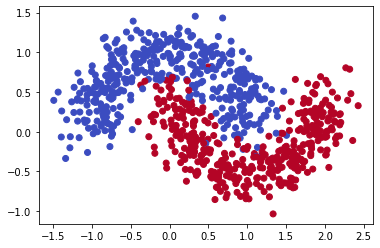

In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_hat))

Accuracy:  0.91


### Gradient Boosting 

In [61]:
# 1st model 
tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train, y_train)
y1 = (y_train - tree1.predict(X_train)) # risiduals

# 2nd model
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X_train, y1) # residulas first model
y2 = y1 - tree2.predict(X_train)

# 3rd model

tree3 = DecisionTreeClassifier(max_depth=2)
tree3.fit(X_train, y2)

y3 = y2 - tree3.predict(X_train)

# 4th model

tree4 = DecisionTreeClassifier(max_depth=3)
tree4.fit(X_train, y3)

y4 = y3 - tree4.predict(X_train)

y_hat = sum(tree.predict(X_test) for tree in [tree1, tree2, tree3, tree4])
print('Accuracy: ', accuracy_score(y_test, y_hat))

Accuracy:  0.91


In [73]:
models = [ DecisionTreeClassifier(max_depth=2) for _ in range(200) ]

In [80]:
op = y_train
for model in models:
    model.fit(X_train, op)
    pred = model.predict(X_train)
    op = op - pred

In [81]:
def predict(X_test):
    preds = []
    for model in models:
        preds.append(model.predict(X_test))
    return sum(preds)

y_hat = predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_hat))

Accuracy:  0.91


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
clf = GradientBoostingClassifier(n_estimators=150, max_depth=2)
# by default using Tree algorithm

In [70]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.97


In [ ]:
!python -m pip install xgboost --upgrade

`unsupervise learning`

[K-Means Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### Interita 

      mean square distance of each point from it's closest centroid

In [1]:
from sklearn.datasets import make_moons

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [7]:
#help(make_blobs)

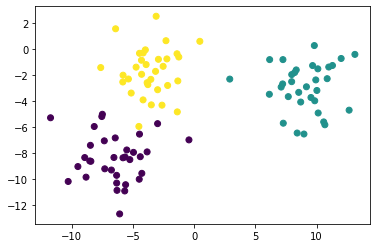

In [55]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                 cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

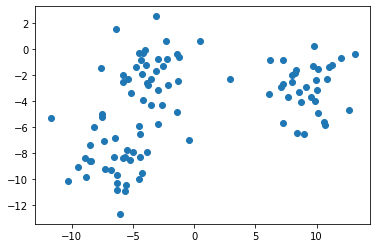

In [56]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [57]:
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters=k)

In [58]:
model.fit(X)

KMeans(n_clusters=3)

In [59]:
labels = model.predict(X)

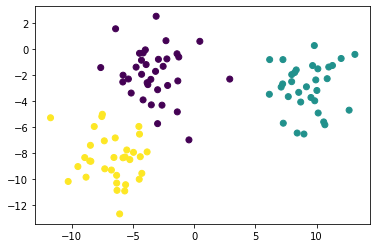

In [60]:

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [61]:
model.inertia_

692.5827913025857

In [62]:
from sklearn.cluster import KMeans

ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ints = [ ]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ints.append(model.inertia_)

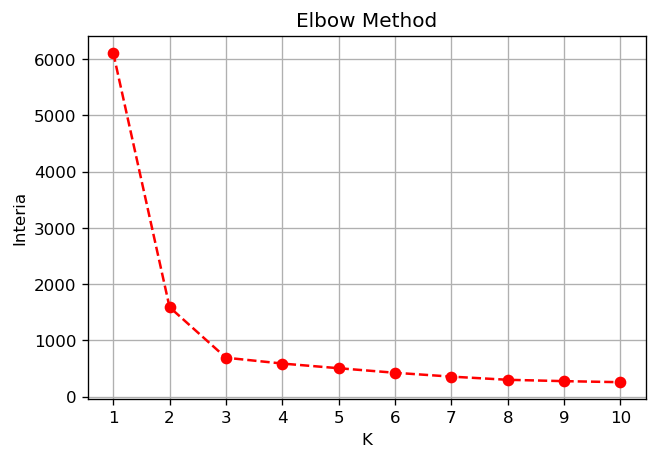

In [68]:
plt.figure(dpi=120)
plt.plot(ks, ints, '--or')
plt.xlabel('K')
plt.ylabel('Interia')
plt.title("Elbow Method")
plt.xticks(ks)
plt.grid()
plt.show()

#### DBSCAN

In [75]:
model = KMeans(n_clusters=3)
model.fit(X)
p = X[67:68]

model.predict(p)

array([1])

In [78]:
m = { 0: 'red', 1: 'blue', 2:'green'}

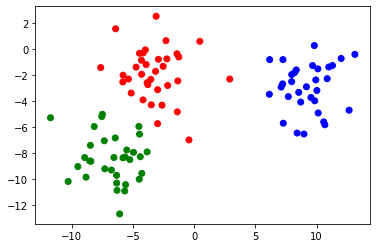

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=[ m[lb] for lb in model.labels_])
plt.show()